## LinearRegression

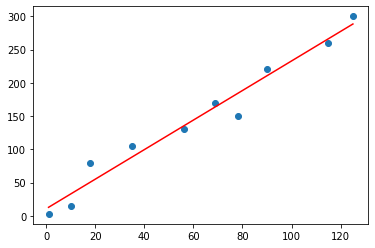

[2.22123246]
10.692422122655756


In [2]:
#NumPy is a general-purpose array-processing package.
#matplotlib.pyplot:- for plotting graph.
##LinterRegression:- this is imported from sklearn.linear_model. Used for performing linear regression

import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

x = np.array([1,10,18,35,56,69,78,90,115,125])
y = np.array([3,15,80,105,130,170,150,220,260,300])

##Here we would create a LinearRegression object 
linreg = LinearRegression()

x = x.reshape(-1, 1)

linreg.fit(x,y)

##our model is ready to predictions using test dataset.
y_pred = linreg.predict(x)

##Now we would create a simple scatter plot to see how the data looks like. The code and the output is given below:
plt.scatter(x,y)
plt.plot(x,y_pred, color='red')
plt.show()

print(linreg.coef_) #coeeficient

print(linreg.intercept_) #intercept

## LogisticRegression

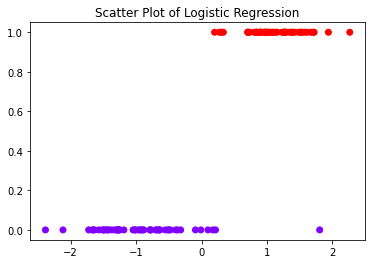

[[3.04547387]]
[-0.49970433]


array([[10,  1],
       [ 0, 14]], dtype=int64)

In [1]:
#We  would import the following modules:

#make_classification:- available in sklearn.datasets and use to generate dataset

#matplotlib.pyplot:- for plotting graph.

#LogisticRegression:- this is imported from sklearn.linear_model. Used for performing logistic regression

#train_test_split:-  imported from sklearn.model_selection and used to split dataset into training and test datasets

#confusion matrix:- imported from sklearn.metrics and used to generate the confusion matrix of the classifiers

#Pandas for managing datasets.


from sklearn.datasets import make_classification
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import pandas as pd

# Now we need to generate the dataset using the make_classification() function. we need to specify the number of samples, 
#the number of feature, number of classes and other parameters.
x, y = make_classification(
    n_samples=100,
    n_features=1,
    n_classes=2,
    n_clusters_per_class=1,
    flip_y=0.03,
    n_informative=1,
    n_redundant=0,
    n_repeated=0
)

#Now we would create a simple scatter plot to see how the data looks like. The code and the output is given below:
plt.scatter(x, y, c=y, cmap='rainbow')
plt.title('Scatter Plot of Logistic Regression')
plt.show()

#Now we would split the dataset into training dataset and test dataset.
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=1)

#Here we would create a LogistiRegression object and fit it with out dataset.
log_reg = LogisticRegression()
log_reg.fit(x_train, y_train)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

# coeeficient & intercept
print(log_reg.coef_)
print(log_reg.intercept_)

#our model is ready to predictions using test dataset.
y_pred = log_reg.predict(x_test)


#confusion matrix help you to show how our model work.
confusion_matrix(y_test, y_pred)

## True positive: 11  :– Number of positives we predicted correctly
# True negative: 13 :– Number of negatives we predicted correctly
# False positive: 1  :– Number of positives we predicted wrongly
# False negative:  0 :– Number of negatives we predicted wrongly


## Bayes Theorem

From: dmcgee@uluhe.soest.hawaii.edu (Don McGee)
Subject: Federal Hearing
Originator: dmcgee@uluhe
Organization: School of Ocean and Earth Science and Technology
Distribution: usa
Lines: 10


Fact or rumor....?  Madalyn Murray O'Hare an atheist who eliminated the
use of the bible reading and prayer in public schools 15 years ago is now
going to appear before the FCC with a petition to stop the reading of the
Gospel on the airways of America.  And she is also campaigning to remove
Christmas programs, songs, etc from the public schools.  If it is true
then mail to Federal Communications Commission 1919 H Street Washington DC
20054 expressing your opposition to her request.  Reference Petition number

2493.



'comp.graphics'

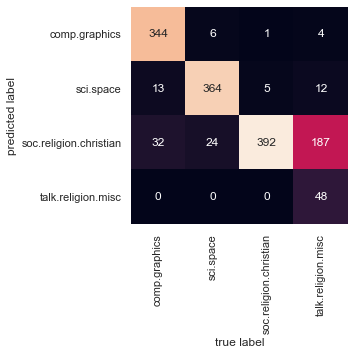

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

from sklearn.datasets import make_blobs
X, y = make_blobs(100, 2, centers=2, random_state=2, cluster_std=1.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='RdBu');

from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X, y);

rng = np.random.RandomState(0)
Xnew = [-6, -14] + [14, 18] * rng.rand(2000, 2)
ynew = model.predict(Xnew)


plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='RdBu')
lim = plt.axis()
plt.scatter(Xnew[:, 0], Xnew[:, 1], c=ynew, s=20, cmap='RdBu', alpha=0.1)
plt.axis(lim);


yprob = model.predict_proba(Xnew)
yprob[-8:].round(2)

from sklearn.datasets import fetch_20newsgroups

data = fetch_20newsgroups()
data.target_names

categories = ['talk.religion.misc', 'soc.religion.christian',
              'sci.space', 'comp.graphics']
train = fetch_20newsgroups(subset='train', categories=categories)
test = fetch_20newsgroups(subset='test', categories=categories)

print(train.data[5])

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline

model = make_pipeline(TfidfVectorizer(), MultinomialNB())

model.fit(train.data, train.target)
labels = model.predict(test.data)

from sklearn.metrics import confusion_matrix
mat = confusion_matrix(test.target, labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=train.target_names, yticklabels=train.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');

def predict_category(s, train=train, model=model):
    pred = model.predict([s])
    return train.target_names[pred[0]]

predict_category('sending a payload to the ISS')

predict_category('discussing islam vs atheism')

predict_category('determining the screen resolution')